In [2]:
import pandas as pd 
df = pd.read_csv('../chifoumy/data/david_chifoumi-dataset.csv')
df.head(2)

,filename,1x,1y,1z,2x,2y,2z,3x,3y,3z,...,19x,19y,19z,20x,20y,20z,21x,21y,21z,target
0,/Users/davidr/code/ElainePentium/chifoumy/raw_...,0.925660,0.539289,0.000001,0.802717,0.710398,-0.012537,0.663807,0.708084,-0.032481,...,0.618167,0.327418,-0.088626,0.642496,0.39060,-0.061581,0.686315,0.407440,-0.035161,2
1,/Users/davidr/code/ElainePentium/chifoumy/raw_...,0.068998,0.541623,0.000002,0.183035,0.702427,-0.024460,0.320909,0.697881,-0.044597,...,0.383747,0.337245,-0.073658,0.353211,0.38952,-0.049047,0.313666,0.408062,-0.020845,2


In [3]:
df.shape

(13892, 65)

In [4]:
X = df.drop(['filename', 'target'], axis = 1)
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
y_train

3503     0
12995    4
2412     2
4511     0
2912     0
        ..
11781    4
4997     0
13281    4
11655    4
8237     3
Name: target, Length: 9724, dtype: int64

In [13]:
# X_train = (X_train - X_train.mean()) / X_train.std()
# X_train
# X_test = (X_test - X_test.mean()) / X_test.std()
# X_test

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
5804,1.357512,-0.308635,-1.243735,1.295110,0.250679,0.485578,0.941208,0.760783,0.429743,0.417643,...,0.460001,0.245972,-0.782209,0.573339,0.446815,-0.825202,0.627021,0.612134,-0.832672,0.593356
6032,0.774480,0.308768,-0.732764,0.605230,-0.609996,0.686638,0.187166,-1.364279,0.744861,-0.393376,...,0.735378,-0.163951,1.560997,0.797957,0.028351,1.511249,0.729007,0.180339,1.361637,0.614366
8061,-0.342573,0.765572,-0.920501,0.357392,0.371764,0.798045,0.934927,-0.194741,0.826655,1.171859,...,0.524936,-1.146411,0.170295,0.788189,-1.154789,0.335129,0.835488,-1.052446,0.459807,0.769473
1825,0.188576,-1.508819,0.725272,0.874915,-1.562656,2.114927,1.061674,-1.394772,1.507298,0.820639,...,-1.328880,-0.703317,-0.196751,-0.505264,-0.504929,-0.416624,0.202831,-0.360624,-0.616511,0.672348
161,2.137208,0.461552,-0.468450,1.962597,0.835497,-0.422710,1.691108,0.919108,-0.576152,1.650455,...,-0.962961,1.488143,-0.440653,-1.055460,1.719309,-0.250885,-0.904760,1.872242,-0.178698,-0.753311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,0.719249,1.359211,0.413713,-0.026902,1.131086,-0.587165,-0.554317,0.805325,-0.718981,-0.783510,...,-0.321839,1.689664,0.463275,-0.400272,1.668845,-0.003523,-0.484036,1.504556,-0.339588,-0.525035
5387,0.540929,1.189209,0.218818,1.452980,0.760866,3.615524,1.834736,0.229608,4.097756,1.866882,...,1.856432,-0.454303,0.060128,1.655242,-0.538350,-0.429804,1.394937,-0.536459,-0.776677,1.240234
4790,-0.171289,-1.238059,0.398628,0.631547,-1.404169,-0.635640,1.035230,-1.191626,-0.634175,1.190166,...,-0.891789,-1.432647,0.330196,-1.052513,-1.494272,0.770092,-1.317625,-1.400678,1.077245,-1.480392
540,1.719275,0.821008,0.661529,1.737371,0.019637,-0.648728,1.468940,-0.354833,-0.702466,1.248695,...,-0.323113,1.095378,1.805681,-0.314592,1.349079,1.624170,-0.204933,1.433728,1.516638,-0.094350


In [7]:
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [8]:
model = SVC(kernel= 'poly', gamma = 1, coef0 = 0, C = 0.01, probability=True)
# X_train = (X_train - X_train.mean()) / X_train.std()
# rounder = FunctionTransformer(lambda array: np.round(array, decimals=2))
normalizer = FunctionTransformer(lambda x: (x - x.mean()) / x.std())
scaling = make_column_transformer((MinMaxScaler(), make_column_selector(dtype_include=['float64'])))
pipeline = make_pipeline(normalizer, scaling, model)
pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x13f0948b0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13f7db400>)])),
                ('svc',
                 SVC(C=0.01, coef0=0, gamma=1, kernel='poly',
                     probability=True))])

In [9]:
pipe = pipeline.fit(X_train, y_train)

In [10]:
pd.DataFrame(normalizer.fit_transform(X_train)).head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
3503,-0.772404,1.509700,-0.690744,0.206656,1.285076,0.316823,0.870467,0.804452,0.471973,1.051936,...,0.819011,-1.686410,0.692566,1.106707,-1.510871,0.853966,1.265783,-1.419558,0.968115,1.304707
12995,-0.201041,1.144897,0.834626,0.347268,0.953858,0.690781,0.745900,0.733568,0.524415,0.985307,...,-1.490301,-1.419422,0.411535,-1.675541,-1.574981,0.003151,-1.956180,-1.550022,-0.317007,-2.109115
2412,1.746410,-0.249537,0.855004,1.600723,0.429632,-0.276395,1.213558,0.595405,-0.347734,0.864132,...,-0.357651,0.647434,-1.369343,-0.339841,0.748809,-1.063254,-0.105637,0.948106,-0.932608,0.150072
4511,0.120677,1.159550,-1.469730,-0.716795,0.894444,0.234335,-1.173420,0.450102,0.224472,-0.992535,...,0.344732,1.293093,0.323468,0.506589,1.138429,0.481837,0.623559,1.030928,0.627183,0.697238
2912,1.312841,-0.058249,-1.311156,1.072852,0.825217,0.533857,0.590934,1.569250,0.475998,-0.164805,...,0.501385,-0.049232,-0.713671,0.986505,0.170070,-0.622438,1.251533,0.377826,-0.598243,1.302074


In [11]:
y_pred = pipe.predict(X_test)

In [12]:
pd.DataFrame(normalizer.fit_transform(X_test)).head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
4787,-0.580143,1.079148,-0.602845,0.451166,1.077554,0.139630,1.367288,0.841860,0.105975,1.961554,...,0.022318,-0.664586,0.098092,0.401967,-0.628882,0.252830,0.744788,-0.719484,0.391369,0.880259
10152,0.644236,0.916614,-0.761506,0.405027,1.056742,-2.213610,-0.072191,1.065931,-2.067004,-0.741062,...,1.397861,-0.409428,-0.138560,0.869598,-0.784098,-0.075301,0.445894,-1.003203,0.049575,0.173803
11110,-0.984288,0.838935,0.398370,-1.000852,0.436764,-0.087072,-0.625556,0.230133,-0.060351,-0.097178,...,0.333744,0.690740,1.756498,0.259024,1.105776,1.638939,0.171929,1.371371,1.459127,0.108885
8169,-1.075205,1.328218,0.289854,-0.682111,1.461080,0.024722,-0.192257,1.122343,0.058598,0.342411,...,0.388456,-0.415372,0.196302,0.056186,0.052237,0.280803,-0.189682,0.429742,0.345956,-0.339983
5019,-0.341365,1.042495,-0.419659,0.462088,0.875567,0.043957,1.016553,0.520173,-0.027500,0.907150,...,-0.358755,-1.195420,0.109344,-0.075605,-1.030872,0.242832,0.272733,-0.977175,0.392727,0.475389


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9961612284069098

In [14]:
pd.DataFrame(y_pred).value_counts()

4    891
2    848
3    847
1    818
0    764
dtype: int64

In [15]:
results = pd.DataFrame({"actual" : y_test,
                       "predicted" : y_pred})

confusion_matrix = pd.crosstab(index= results['actual'],
                              columns = results['predicted'])
confusion_matrix

predicted,0,1,2,3,4
actual,,,,,
0,763,0,0,1,0
1,0,812,0,0,4
2,0,0,848,0,2
3,1,0,0,846,2
4,0,6,0,0,883


In [156]:
import pickle
import dill

with open("pipe.pkl", "wb") as file:
    pickle.dump(, file)

In [39]:
model = SVC(kernel= 'poly', gamma = 1, coef0 = 0, C = 0.01, probability=True)
# normalizer = FunctionTransformer(lambda x: (x - x.mean()) / x.std())
scaler = MinMaxScaler()
X_train_normalized = X_train.apply( lambda x : (x- x.mean()) / x.std(), axis =1)
X_test_normalized = X_test.apply( lambda x : (x - x.mean()) / x.std(), axis=1)
#X_train_normalized = normalizer.transform(X_train)
#X_test_normalized = normalizer.transform(X_test)
scaler = scaler.fit(X_train_normalized)

X_train_preprocessed = scaler.transform(X_train_normalized)
X_test_preprocessed = scaler.transform(X_test_normalized)

trained_model = model.fit(X_train_preprocessed, y_train)
y_pred = trained_model.predict(X_test_preprocessed)
y_pred_proba = trained_model.predict_proba(X_test_preprocessed)
y_pred, y_pred_proba

(array([0, 1, 2, ..., 1, 0, 2]),
 array([[9.99856719e-01, 8.02494495e-05, 6.30316128e-05],
        [1.09715579e-05, 9.96358494e-01, 3.63053394e-03],
        [8.31284891e-07, 4.24153959e-07, 9.99998745e-01],
        ...,
        [6.92392937e-06, 9.97135641e-01, 2.85743492e-03],
        [9.99341340e-01, 1.70622467e-04, 4.88037927e-04],
        [1.28118316e-08, 7.93341065e-09, 9.99999979e-01]]))

In [40]:
type(X_test_preprocessed)

numpy.ndarray

In [30]:
#X_test_normalized, 
#X_test_preprocessed, 
y_pred

array([1, 2, 2, ..., 2, 0, 2])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.999187982135607

In [32]:
results = pd.DataFrame({"actual" : y_test,
                       "predicted" : y_pred})

confusion_matrix = pd.crosstab(index= results['actual'],
                              columns = results['predicted'])
confusion_matrix

predicted,0,1,2
actual,,,
0,811,0,2
1,0,869,0
2,0,0,781


In [33]:
import dill

with open("trained_model.pkl", "wb") as file:
    dill.dump(trained_model, file)
    
with open("scaler.pkl", "wb") as file:
    dill.dump(scaler, file)

In [12]:
import pickle
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
    
with open("trained_model.pkl", "wb") as model:
    pickle.dump(trained_model, model)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [35]:
probas = pd.DataFrame(pipe.predict_proba(X_test))
probas = probas[probas <= 0.9].dropna().rename(columns = {0:'pierre', 1:'feuille', 2:'ciseaux'})

probas_filename = list(df.filename.iloc[probas.index])

In [36]:
probas_filename

['../raw_data/scissors/1jKhi65BPTLXnUI6.png',
 '../raw_data/scissors/CTbANISUvZMD2T4L.png',
 '../raw_data/scissors/MfDDFjVkEdWKPi2X.png',
 '../raw_data/scissors/uU7I4uUVN2mDwZpo.png',
 '../raw_data/scissors/MqPYNCxzDBls3LRf.png',
 '../raw_data/scissors/evBSpeXRlbUu82CV.png',
 '../raw_data/scissors/8K3rwVoAAjAqkkqq.png']

In [85]:
y_test.iloc[probas.index]

1522    2
7242    0
7916    0
4450    1
2487    2
8130    0
3654    1
Name: target, dtype: int64

In [89]:
for index, row in probas.iterrows():
    print(row.max())

0.8968186639489658
0.7202425232866688
0.8957774574707663
0.890598118369437
0.41625421090844056
0.865279681849957
0.7723748036614674


In [94]:
pd.DataFrame(y_pred).value_counts(), pd.DataFrame(y_test).value_counts()

(1    838
 2    822
 0    803
 dtype: int64,
 target
 1         838
 2         823
 0         802
 dtype: int64)

In [101]:
probas_filename[i]

'../raw_data/scissors/1jKhi65BPTLXnUI6.png'

KeyError: 0

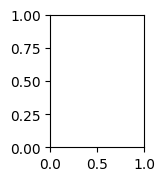

In [98]:
# Let's see some hands.
fig = plt.figure(figsize=(7,10))

for i in range(len(probas_filename)):
    plt.subplot(5, 5, i + 1)
    plt.title(y_test[i], size=11)
    plt.imshow(mpimg.imread(probas_filename[i]))
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()